<img src="./img/HWNI_logo.svg"/>

# Lab 00b - Review of Statistics Fundamentals with Pandas and Seaborn

We'll begin by going over both key notions from probability and some of the most fundamental statistics -- means, medians, and so on. We'll also take this opportunity to practice using the technological tools we'll need for this course. If you're unfamiliar with them, make sure to check out the `Tech Tools Tutorial` folder for brief introductions.

If you've never done any computer programming before, make sure to work through the [Codecademy Python course](https://www.codecademy.com/learn/python) through Lesson 9 as soon as possible. You won't necessarily need it to make it through this lab, but baseline comfort with programming is a key skill for this course and for most of science today.

## What is Statistics?

A *statistic* is a number or collection of numbers that describes a dataset. In the field of statistics, we study the properties of these descriptions: which datasets do they summarize well? when does a difference in a statistic mean the datasets are different? how can I tell whether one statistic or another is a better summary of the data?

Our goal is *understanding* data -- being able to build models that describe it well or being able to predict the behavior of a system well enough to control it (e.g. to fix it when it is broken, as in medicine).

To get our hands on some statistics,we first need a dataset. We'll be working with two. For concreteness' sake, let's say one represents the number of spikes produced by a neuron in response to repeated presentations of some stimulus and the other represents the reaction times of a subject during a memory task.

In [1]:
# makes our plots show up inside Jupyter
%matplotlib inline

# numpy - linear algebra and matrices for python
import numpy as np

# pandas - "DataFrames" to organize our data
import pandas as pd

# matplotlib - workhorse plotting library
import matplotlib.pyplot as plt

# seaborn - easy plotting for statistical visualizations
#   based off of matplotlib
import seaborn as sns

# choose colors that work for most color-blind folks
sns.set_palette("colorblind")
sns.set(color_codes=True)

import util.lab00utils as utils 

# this makes our tables easier to read
utils.formatDataframes()

In [37]:
numDatapoints = 25

spikes = np.random.poisson(2,size=numDatapoints)
times = np.random.normal(6,1.1,size=2*numDatapoints)

First, we take a look at our data. Since there are only 25 points apiece, we can look at all of the data at once using the `print` function.

In [38]:
print("Spikes: {}".format(spikes))
print("="*100)
print("Reaction Times : {}".format(times))

Spikes: [2 0 2 6 2 2 1 1 3 1 1 2 2 3 1 3 0 3 1 4 2 0 3 1 1]
Reaction Times : [ 4.74173655  4.74129462  5.27122193  6.03595269  4.05422307  6.9415886
  7.12868826  5.51631217  3.89768533  6.02953982  5.86152117  5.93713324
  3.02107478  5.75221134  5.53675627  6.02411356  5.65545537  3.86574176
  5.43932401  5.82021225  7.16899968  6.67326387  6.6550681   6.35335357
  4.54025776  4.84544445  6.38905693  6.66589823  4.86836659  5.44859761
  5.72435311  6.81189422  7.11187094  9.12745703  7.20161129  6.28629031
  6.93077823  5.3941024   5.93720776  5.4165785   3.97120971  7.52421073
  4.71170749  5.98954463  6.83051535  7.84882267  6.26487272  5.22198002
  5.78727667  5.15957585]


As far as descriptions of a dataset go, a list of every data point is an accurate one, but not a very useful one.

Next, we'll go over how to plot our whole dataset at once, getting a "visual summary" that can give us some intuition for what's going on in our data. Then, we'll go over some descriptive statistics that can numerically summarize our data and methods for visualizing those statistics.

But first, we'll talk a bit about how to organize our data.

# Organizing Data: Numpy Arrays and Pandas Dataframes

In the last lab, we talked about two ways of representing probability mass functions: as lists and as dictionaries. Lists and dictionaries are examples of what are called *data structures*. Data structures help us organize information when working with computer programs. Lists and dictionaries are extremely flexible data structures that can be used for a wide variety of purposes -- even implementing whole programming languages! 

We're interested in a somewhat smaller range of applications: working with data, usually numeric. For this, we turn to two tools that are specialized versions of lists and dictionaries -- less flexible than their forebears but with features we need all ready to go.

### Numpy Arrays

Often, when we have a list of data, it comes as a one, two, or more dimensional box: a vector, a matrix, or a more general *array* of data, where each piece of data is a number. For example, a song might be represented as a vector, an image can be represented as a matrix, and an album of images can be represented as a three-dimensional array (a stack of matrices).

The package `numpy` implements a bunch of useful routines for working with arrays of data. For example, I used numpy (alias `np`) to generate the randomized arrays of data above. Numpy can also efficiently perform linear algebra operations (like matrix multiplication), Fourier transforms, convolutions, and lots of basic mathematical operations (like trigonometric functions).

This includes basic statistical operations, like computing means, covariances, and such.

### Pandas Dataframes

Numpy arrays would be sufficent for what we'll be doing in this lab, where all we have is a list of data values.
However, in neuroscience we often have to deal with complicated datasets -- a full "data point" from a neuroscience experiment might include several numbers (input stimulus and neural response) along with a host of metadata -- subject ID, brain region, genotype, experiment date, and so on. In principle, it's possible to organize all of this information in a collection of arrays, lists, dictionaries, and so on, but it's easy to make mistakes and hard to keep everything in agreement.

The standard solution to this problem is a data structure called a *dataframe* or a *table*. A dataframe is like a two-dimensional array that isn't restricted to holding only numbers and that uses either numbers or strings as indices. That might remind you of a dictionary, and it should: a dataframe is like a dictionary of arrays that are all the same length.

In Python, the most popular implementation of dataframes is in the `pandas` library. To start getting used to pandas, we'll use it in this lab, even though it isn't strictly necessary. If you'd like to learn more about how to use pandas, check out the tutorial on using pandas in the `Tech Tools Tutorials/` folder.

Let's get started by converting our data into a dataframe. There are multiple ways to do this, and I'll just show one here: starting from a dictionary. In the next lab, we'll use the `from_csv` method to load in external data, which is generally more useful.

If we have a dictionary, we can use the `from_dict` method from pandas to make a dataframe. The keys of the dictionary become column names and the values stored in the dictionary become the values in the columns.

In [39]:
spikeDataDictionary = {'spikes':spikes}

dfSpike = pd.DataFrame.from_dict(spikeDataDictionary)

dfSpike

,spikes
0,2
1,0
2,2
3,6
4,2
5,2
6,1
7,1
8,3
9,1


We can do the same with the reaction time data. However, when we looked at the dataframe in the last cell, we printed out all of the values at once, which takes up a lot of space. To save real estate, when we check our results afterwards, we can use the `.head()` method to look at just the first few elements.

In [40]:
dfTimes = pd.DataFrame.from_dict({'times':times})

dfTimes.head()

,times
0,4.741737
1,4.741295
2,5.271222
3,6.035953
4,4.054223


# Visualizing Data

Now that we have our data in a dataframe, let's start visualizing it. Pandas dataframes work well with a statistical visualization package called `seaborn`, on which there's more in the tutorial *Plotting with Seaborn*. That tutorial is meant to serve as a reference for most of the plotting we'll need to do for the first few weeks of the course, so there's no need to work through the entirety of it just now.

You might be familiar with *scatterplots*, which show pairs of data values as points in a two-dimensional plane. The one-dimensional equivalent of a scatterplot is called a *rugplot*, after its passing resemblance to a shag carpet. In a rugplot, we simply place a small tickmark at each number where we observed a data value, as below:

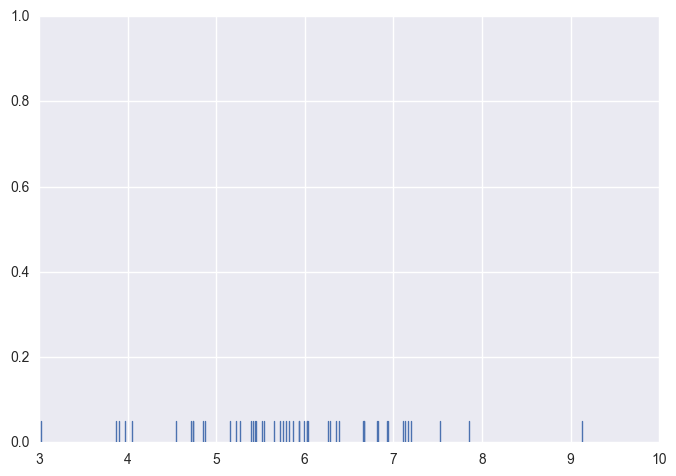

In [41]:
# sns is our alias for seaborn
#  and we call the rugplot function 

sns.rugplot(dfTimes);

This gives us a sense of where the data values fall -- they appear to be clustered somewhat around 5.5 or 6, and to be somewhat evenly distributed on both sides of that value.

Now, use `sns.rugplot` on the spike data:

In [43]:
# your code here

This rugplot is much less informative. Can you explain why? Think back to the distinction between probability mass functions and probability density functions in the first half of the lab. Do you see a connection?

Another commonly-used plot for visualizing data distributions, the *histogram*, is able to handle both kinds of datasets. To make a histogram, we split the data axis into a number of discrete "bins" and count how many data values fall into each bin. Often, we divide the number in each bin by the total number of data points in order to get a ratio.

Such a histogram is a probability density function. What events does it describe the probability of?

In seaborn, the function we use to plot histograms is called `distplot`. It's capable of producing histograms, rugplots, and another visualization called a *kernel density estimate* (KDE) in any combination. For more information on how to use this function, check out the section on *Visualizing Distributions* in the *Plotting with Seaborn* tutorial.

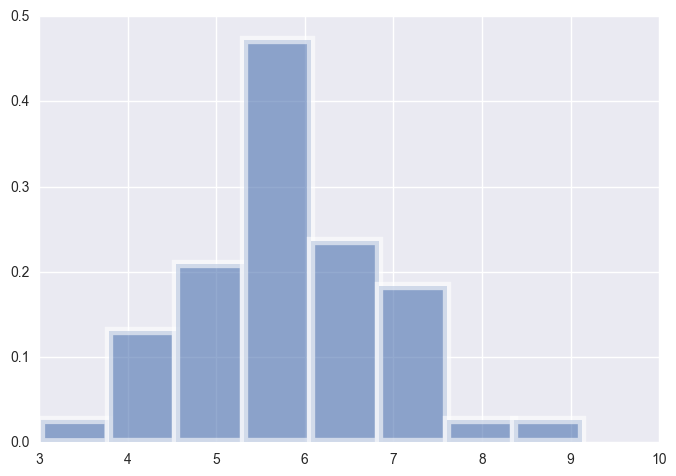

In [75]:
style_parameters = {'linewidth':6,
                   'edgecolor':'white',
                   'alpha':0.6,
                   'normed':True,}

sns.distplot(dfTimes, #which data to use?
             hist=True,kde=False, #plot histogram or kde?
             rug=False, #include a rugplot for reference?
             hist_kws=style_parameters #lots of other parameters
            );

Now, let's apply it to the spikes dataset.

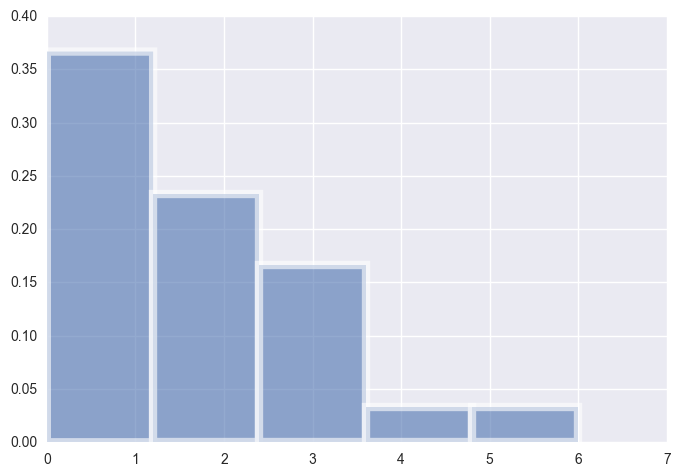

In [76]:
sns.distplot(dfSpike,hist=True,kde=False,
            hist_kws=style_parameters);

This is certainly a much better picture of the data than the rugplot gave, but there's still something that's not quite right. Can you see what it is?

Adding the `bins` argument to distplot lets you change the location of the bins. You can either give a number, and distplot will place that many evenly-sized bins where it thinks is best, or you can give a list of locations for the left edges of the bins. First, play around with different numbers of bins for the reaction times dataset, then, try fixing the histogram for the spikes data so that it represents the data better.

# Descriptive Statistics

Nowadays, thanks to ubiquitous, inexpensive, and easy-to-use computation, building high-quality visualizations of your data is a breeze, and you can iterate over multiple different visualizations (e.g. histograms with different bin sizes) in seconds, and you can share those visualizations instantly with anyone with an internet connection.

Before these happy days, there was more interest in simple descriptions of datasets that could be easily computed, compared against tables, and shared -- where is the "center" of the data? is the data more likely to be above the center or below the center? are there any data points that fall very far away from the others?

These simple descriptions, also known as *statistics*, are still incredibly useful for distilling information out of data. One of the major goals of this course is to learn what these statistics do and do not tell you, what assumptions about your data are necessary to use them, and when they can lead you astray.

## Mean

## Median

## Quartiles and Percentiles

The list of numbers printed above is one way to describe the dataset. It's an accurate way of describing the data, but it's very unwieldy and it doesn't give any insight into the data. For example: it's difficult to tell where the middle of the data is just by looking at those numbers.

If we want to understand our data better, we need to summarize it, visualize it, or both! Let's start by summarizing our data.

First, we'll calculate the *average*, or *mean*, of our data. The mean of a dataset is the sum of all the numbers in the dataset divided by the size of the dataset. Below, calculate the mean of our dataset using a for loop.